In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
import netCDF4
import xarray as xr

import xarray.plot as xplt

In [8]:
#open NETCDF files (all .nc files from path) for "specific humidity"
ds_RH_600 = xr.open_mfdataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/RH_600hPa/*.nc', combine = 'by_coords')
ds_RH_650 = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/Era5_2008to2012_RH_650hPa.nc')
ds_RH_700 = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/Era5_2008to2012_RH_700hPa.nc')
ds_RH_750 = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/Era5_2008to2012_RH_750hPa.nc')



In [10]:
ds_MaunaKea_RH_650 = ds_RH_650.sel(longitude=204.53,latitude= 19.83,method='nearest')

In [5]:
ds_650_monthly = ds_MaunaKea_SH_650.groupby('time.month').mean(dim='time')

In [6]:
ds_650_monthly


<xarray.Dataset>
Dimensions:    (month: 12)
Coordinates:
    longitude  float32 204.5
    latitude   float32 19.75
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    r          (month) float32 22.287264 31.609018 ... 35.42062 34.335308

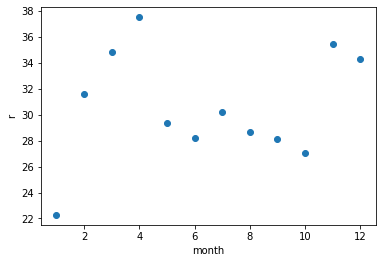

In [27]:
ds_650_monthly.plot.scatter('month', 'r')


In [29]:
df_650 = ds_650_monthly.to_dataframe()

In [45]:
df_650

,longitude,latitude,r
month,,,
1,204.5,19.75,22.287264
2,204.5,19.75,31.609018
3,204.5,19.75,34.864044
4,204.5,19.75,37.505226
5,204.5,19.75,29.363436
6,204.5,19.75,28.198734
7,204.5,19.75,30.189020
8,204.5,19.75,28.690310
9,204.5,19.75,28.119877


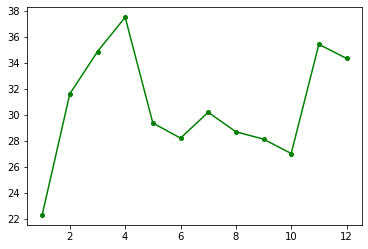

In [42]:
df_650['r']
plt.plot(df_650['r'], '-go', markersize = '4')

In [37]:
df_650['longitude']

month
1     204.5
2     204.5
3     204.5
4     204.5
5     204.5
6     204.5
7     204.5
8     204.5
9     204.5
10    204.5
11    204.5
12    204.5
Name: longitude, dtype: float32

In [19]:
CFHT_monthly = pd.read_csv('/home/caroline/Dropbox/Astroclimate Project/Mauna_Kea/CFHT/pressure_levels_600to750hPa/downsampled_masked_RH_1991to2018_monthly_means.csv')

['Unnamed: 0' 'relative_humidity(%)']


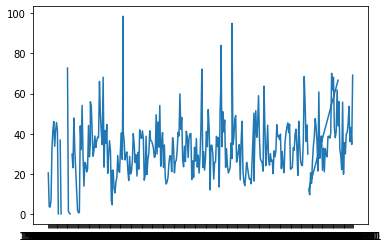

In [61]:
print(CFHT_monthly.columns.values)
CFHT_monthly = CFHT_monthly.rename(columns={'Unnamed: 0': 'time'})
plt.plot(CFHT_monthly['time'], CFHT_monthly['relative_humidity(%)'])

In [52]:
########## for diurnal cycle ##############
from matplotlib import dates as d
import datetime as dt
import time

In [20]:
# rename the columns
CFHT_monthly = CFHT_monthly.rename(columns={'Unnamed: 0': 'times'})

# change the format of the times column to datetime format
CFHT_monthly['time'] = pd.to_datetime(CFHT_monthly['time']) 

#check the format
print(CFHT_monthly['time'].dtype)
print(CFHT_monthly['time'][0])
#CFHT_monthly['times'][0].strftime("%m")

datetime64[ns]
1992-03-31 00:00:00


In [21]:
CFHT_monthly

,times,relative_humidity(%)
0,1992-03-31,20.431535
1,1992-04-30,3.530000
2,1992-05-31,3.473333
3,1992-06-30,6.830000
4,1992-07-31,32.526116
...,...,...
369,2019-09-30,53.603370
370,2019-10-31,36.037366
371,2019-11-30,43.119884
372,2019-12-31,34.646125


In [22]:
# create a new column consisting of the month of the correspondend entry

CFHT_monthly['months'] = CFHT_monthly.index.map(lambda x: time.strftime("%m")) #why is this needed??
for i in range(0,(len(CFHT_monthly))):
               CFHT_monthly['months'][int(i)] = CFHT_monthly['time'][int(i)].strftime("%m")

/home/caroline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [82]:
CFHT_monthly['months_2'] = pd.DatetimeIndex(CFHT_monthly.index).month


In [83]:
CFHT_monthly

,relative_humidity(%),months,months_2
time,,,
1992-03-31,20.431535,03,3
1992-04-30,3.530000,04,4
1992-05-31,3.473333,05,5
1992-06-30,6.830000,06,6
1992-07-31,32.526116,07,7
...,...,...,...
2019-09-30,53.603370,09,9
2019-10-31,36.037366,10,10
2019-11-30,43.119884,11,11


In [167]:
# go through the rows and group by the value of the month

CFHT_monthly_grouped = CFHT_monthly.groupby('months').describe()#.unstack()

In [168]:
#pd.set_option('display.max_rows', 100)
CFHT_monthly_grouped

relative_humidity(%)                                              \
                      count       mean        std        min        25%   
months                                                                    
01                     30.0  33.619390  19.894785   0.733103  21.789848   
02                     27.0  34.987396  16.400670   0.010000  27.766584   
03                     27.0  36.067344  16.953538   0.042895  22.971392   
04                     27.0  30.171198  14.116682   3.530000  22.020181   
05                     28.0  29.713592  12.499817   0.025000  24.333299   
06                     27.0  26.301016   8.543456   6.830000  21.479326   
07                     28.0  34.993253  14.086883  16.680165  27.748274   
08                     27.0  34.180188  11.869798  17.544601  26.364862   
09                     29.0  30.984293  14.063509   0.290000  20.782325   
10                     27.0  32.627478  10.246088  11.770287  24.627334   
11                     27.0  36.610600  13.044430   1.831791  28.888246   
12                     32.0  35.422894  21.719308   0.570000  20.391797   

                                         
              50%        75%        max  
months                                   
01      34.536553  41.082461  98.545192  
02      38.035789  43.256199  70.113566  
03      38.193947  44.454575  72.226649  
04      27.278854  36.918023  68.081675  
05      29.566925  32.020227  58.913608  
06      23.816542  33.136595  41.442374  
07      33.001923  38.297944  95.783390  
08      33.633675  39.481596  68.517370  
09      28.461270  38.288415  66.666667  
10      34.366276  37.306155  56.009402  
11      37.420759  42.736450  66.088096  
12      29.479528  43.739054  95.000000

In [169]:
# the index of the table is now the value of the month
CFHT_monthly_grouped.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='months')

Text(0.5, 1.0, 'Era5 vs. CFHT')

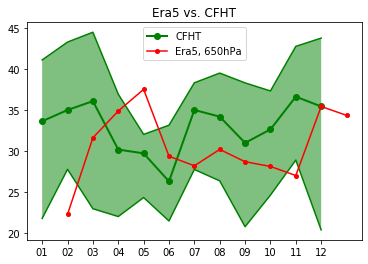

In [189]:
# plot seasonal cycle observational data and also show quartiles

plt.plot(CFHT_monthly_grouped.index, CFHT_monthly_grouped['relative_humidity(%)']['mean'], '-go', linewidth=2.0, 
        label = 'CFHT')
plt.plot(CFHT_monthly_grouped.index, CFHT_monthly_grouped['relative_humidity(%)']['75%'], color='g')
plt.plot(CFHT_monthly_grouped.index, CFHT_monthly_grouped['relative_humidity(%)']['25%'], color='g')
plt.fill_between(CFHT_monthly_grouped.index, CFHT_monthly_grouped['relative_humidity(%)']['mean'], CFHT_monthly_grouped['relative_humidity(%)']['75%'], alpha=.5, facecolor='g')
plt.fill_between(CFHT_monthly_grouped.index, CFHT_monthly_grouped['relative_humidity(%)']['mean'], CFHT_monthly_grouped['relative_humidity(%)']['25%'], alpha=.5, facecolor='g')
plt.plot(df_650['r'], '-ro', markersize = '4', label = 'Era5, 650hPa') #x axis do not overlap!?
plt.legend()
plt.title('Era5 vs. CFHT')

In [13]:
# try to do the same as in R: only take the same amount of data values for calculation of the cycle
# first step is to merge the datasets and take only the overlapping rows (times_CFHT = times_Era5)

import sunpy.timeseries as ts  


#ds_650_full.rename(columns={'time': 'times'})
ds_650_resampled = ds_MaunaKea_RH_650.resample(time = '1m').mean() # ended here on Friday 21. Feb 2020..

In [14]:
ds_650_resampled

<xarray.Dataset>
Dimensions:    (time: 60)
Coordinates:
  * time       (time) datetime64[ns] 2008-01-31 2008-02-29 ... 2012-12-31
    latitude   float32 19.75
    longitude  float32 204.5
Data variables:
    r          (time) float32 25.629631 44.100468 ... 28.495148 24.414818

In [15]:
# convert resampled data to dataframe with an index (DatetimeIndex)

ds_650_full = ds_650_resampled.to_dataframe()

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
               '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31',
               '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31',
               '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
      

In [37]:
#set index 
CFHT_monthly.set_index('times',  inplace=True)



KeyError: "None of ['times'] are in the columns"

In [39]:

# rename 'times' to 'time' 
CFHT_monthly.index.names = ['time']

In [40]:
CFHT_monthly

,relative_humidity(%),months
time,,
1992-03-31,20.431535,03
1992-04-30,3.530000,04
1992-05-31,3.473333,05
1992-06-30,6.830000,06
1992-07-31,32.526116,07
...,...,...
2019-09-30,53.603370,09
2019-10-31,36.037366,10
2019-11-30,43.119884,11


In [71]:
# now try to merge datasets to only compare equal amount of data
#dataframes to merge: CFHT_monthly and ds_650_full

from functools import reduce

df_list = [CFHT_monthly, ds_650_full['r']] #, df3, ..., df_n]
result = reduce(lambda left, right: pd.merge(left, right, left_on='time', right_on='time', how='outer'), df_list)


In [72]:
result

,relative_humidity(%),months,r
time,,,
1992-03-31,20.431535,03,NaN
1992-04-30,3.530000,04,NaN
1992-05-31,3.473333,05,NaN
1992-06-30,6.830000,06,NaN
1992-07-31,32.526116,07,NaN
...,...,...,...
2019-09-30,53.603370,09,NaN
2019-10-31,36.037366,10,NaN
2019-11-30,43.119884,11,NaN


(733042.0, 734533.0)

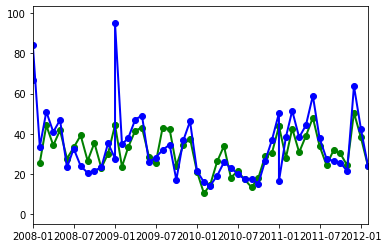

In [73]:
# plot the results
plt.plot(result.index, result['r'], '-go', linewidth=2.0, 
        label = 'CFHT')
plt.plot(result.index, result['relative_humidity(%)'], '-bo', linewidth=2.0, 
        label = 'CFHT')
plt.xlim(dt.date(2008, 1, 1), dt.date(2012, 1, 31))

In [74]:
# delete rows containing NaN

result_noNAN = result.dropna(axis='rows', how='any', thresh=None, subset=None, inplace=False)

In [75]:
result_noNAN

,relative_humidity(%),months,r
time,,,
2008-01-31,33.509357,01,25.629631
2008-02-29,50.946814,02,44.100468
2008-03-31,40.860170,03,34.247917
2008-04-30,46.852975,04,41.659920
2008-05-31,23.205013,05,27.587543
...,...,...,...
2012-08-31,26.851179,08,29.678549
2012-09-30,20.062030,09,33.050205
2012-10-31,31.436762,10,24.611097


In [76]:
# reduce to seasonal cycle

result_grouped = result_noNAN.groupby('months').describe()

In [77]:
result_grouped

relative_humidity(%)                                              \
                      count       mean        std        min        25%   
months                                                                    
01                      5.0  29.262256   9.193320  15.766325  24.072379   
02                      5.0  37.407261  15.382620  14.114826  32.592744   
03                      5.0  37.881503  11.017097  19.103621  38.193947   
04                      5.0  38.604606  11.219524  25.744700  27.205417   
05                      5.0  31.051383  15.615204  23.009633  23.205013   
06                      5.0  29.646041   6.531821  19.857844  28.130076   
07                      5.0  25.369360   5.324907  17.383359  23.901827   
08                      5.0  25.160676   6.580265  17.544601  20.452862   
09                      5.0  19.849977   4.118176  15.022435  16.980403   
10                      5.0  27.841750   6.238255  21.324538  23.224194   
11                      5.0  42.135775  13.617425  28.503034  35.298772   
12                      7.0  40.630211  26.656628  16.400000  24.549782   

                                            r                        \
              50%        75%        max count       mean        std   
months                                                                
01      33.509357  34.648916  38.314304   5.0  22.287266   6.968259   
02      37.932305  50.946814  51.449617   5.0  31.579599  12.642732   
03      40.860170  44.209486  47.040289   5.0  34.864044   6.764959   
04      44.162014  46.852975  49.057922   5.0  37.505226   5.420477   
05      24.319353  25.809310  58.913608   5.0  29.363438  11.185225   
06      30.075748  32.510313  37.656227   5.0  28.198740   5.309837   
07      26.180197  27.513195  31.868222   5.0  30.189022  10.701541   
08      26.376197  26.851179  34.578541   5.0  28.690311  10.463684   
09      20.062030  21.562747  25.622267   5.0  28.119877   7.107894   
10      26.585728  31.436762  36.637531   5.0  27.015085   4.705350   
11      36.960712  46.196574  63.719785   5.0  35.420624   9.105947   
12      31.228674  46.341618  95.000000   7.0  37.111683  10.114794   

                                                               
              min        25%        50%        75%        max  
months                                                         
01      10.205721  23.564188  24.066692  25.629631  27.970095  
02      14.592751  23.236584  33.380363  42.587814  44.100468  
03      26.178671  30.734947  34.247917  41.536606  41.622066  
04      30.124491  33.850658  38.852402  41.659920  43.038654  
05      18.124401  24.511267  27.587543  28.606592  47.987373  
06      21.320738  25.284559  27.399240  33.142998  33.846149  
07      17.188667  24.293295  27.265137  39.134502  43.063507  
08      13.285896  26.460918  29.678549  31.713358  42.312832  
09      17.889484  24.116005  30.144388  33.050205  35.399296  
10      22.927593  24.178202  24.611097  28.985071  34.373466  
11      28.495148  30.098928  30.461164  37.591194  50.456673  
12      21.030788  31.270254  43.772343  44.052618  44.332893

In [ ]:
# now one could plot the data..

In [20]:
################ silly function... do not use unless you see no other way #########################

def resample_and_save(ds_SH, pressurelevel):
    
    # define grid location (lon/lat) Mauna Kea
    ds_MaunaKea_SH = ds_SH.sel(longitude=204.53,latitude= 19.83,method='nearest')

    # resample ERA5 data "Specific humidity"
    # hourly, do nothing
    ds_MaunaKea_SH_resampled_hourly = ds_MaunaKea_SH

    ds_MaunaKea_SH_resampled_daily = ds_MaunaKea_SH.resample(time = '1d').mean()

    ds_MaunaKea_SH_resampled_monthly = ds_MaunaKea_SH.resample(time = '1m').mean()
    print("resampling done")
    # write ERA5 data into dataframe in order to print a csv file
    df_ERA5_monthly = ds_MaunaKea_SH_resampled_monthly.to_dataframe()
    print("monthly done")
    df_ERA5_daily = ds_MaunaKea_SH_resampled_daily.to_dataframe()
    print("daily done")
    df_ERA5_hourly = ds_MaunaKea_SH_resampled_hourly.to_dataframe()
    print("hourly done")

    # save the csv file of the resampled ERA5 data for MaunaKea

    df_ERA5_monthly.to_csv(('downsampled_ERA5_SH_2008to2012_monthly_means_' + pressurelevel + '.csv'))
    df_ERA5_daily.to_csv('downsampled_ERA5_SH_2008to2012_daily_means_' + pressurelevel + '.csv')
    df_ERA5_hourly.to_csv('downsampled_ERA5_SH_2008to2012_hourly_means_' + pressurelevel + '.csv')
    